In [1]:
# imports
from numbers import Number
from typing import Sequence, Callable, Union
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
import numdifftools as nd


In [2]:
# function definitions
def f(x : Number) -> Number:
    return 10 * pow(x, 4) + 3 * pow(x, 3) -30 * x * x + 10*x


def g(x :  Sequence) -> Number:
    return 10 * pow(x[1], 4) + 10 * pow(x[0], 4) + 3 * pow(x[0], 3) - 30 * x[0] * x[0] + 10 * x[0] 

## plotting

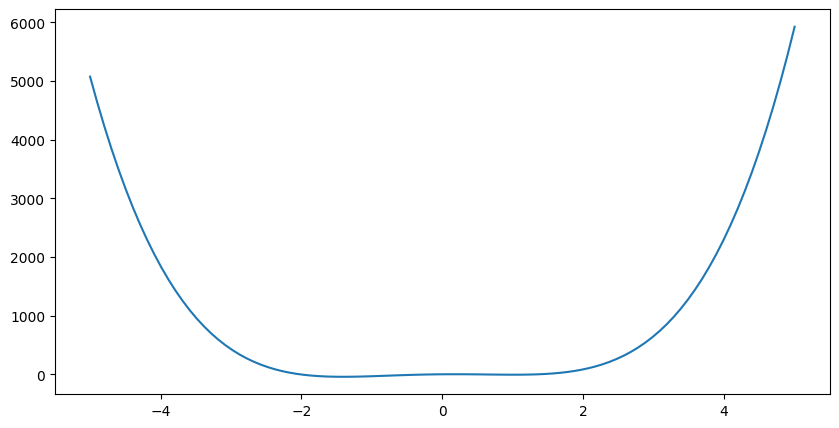

In [3]:
# f(x) plot
x = np.linspace(-5, 5, 100)
fig = plt.figure(figsize = (10, 5))
plt.plot(x, f(x))

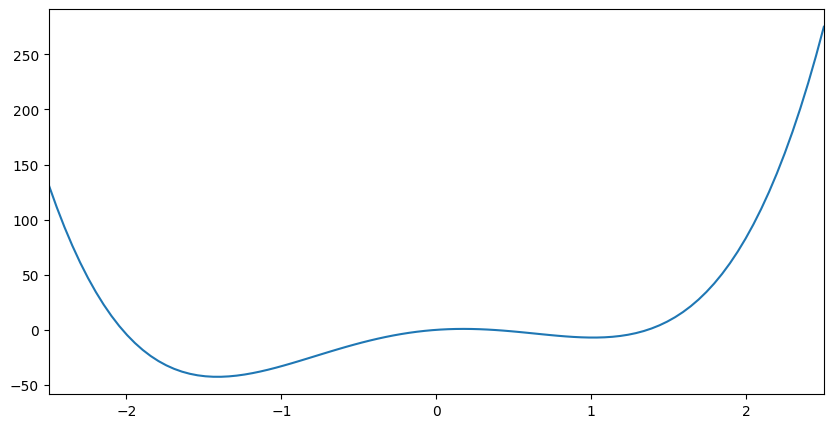

In [4]:
# f(x) plot
x = np.linspace(-2.5, 2.5, 100)
fig = plt.figure(figsize = (10, 5))
plt.xlim([-2.5, 2.5])
plt.plot(x, f(x))

/tmp/ipykernel_8653/500862614.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


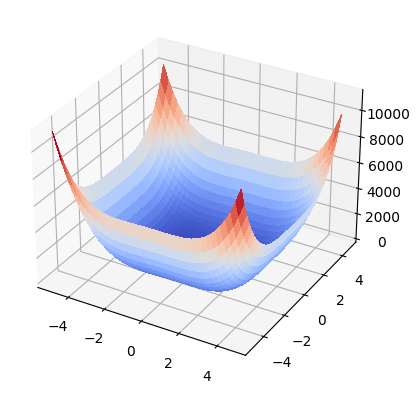

In [4]:
# g(x) plot

# external window
# %matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = g([X, Y])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

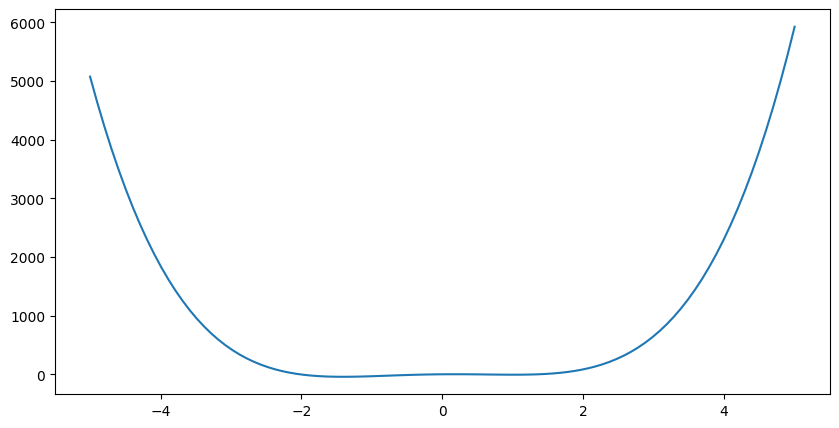

In [5]:
# f(x) plot
x = np.linspace(-5, 5, 100)
fig = plt.figure(figsize = (10, 5))
plt.plot(x, f(x))

/tmp/ipykernel_8653/500862614.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


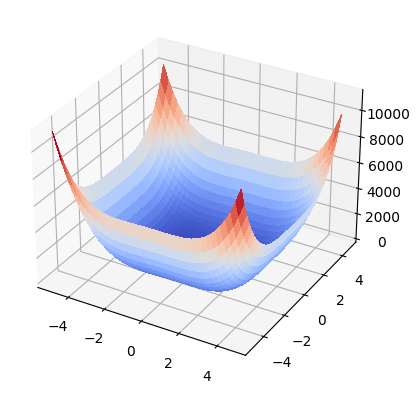

In [6]:
# g(x) plot

# external window
# %matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = g([X, Y])

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

## optimalisation

In [7]:
# params
eps = 0.001

In [7]:
class GradientDescent:
    def __init__(self, eps: Number) -> None:
        self._eps = eps

    @staticmethod
    def _gradient(function: Callable) -> Callable:
        return nd.Gradient(function)

    def _stop_test(self, gradient_at_point: Sequence, point: Number, next_point: Number) -> bool:
        # stationary test
        # stationary = np.linalg.norm(gradient_at_point) <= self._eps
        # distance beetwen poins
        dist =  np.linalg.norm(next_point - point) <= self._eps
        stationary = True
        return stationary and dist

    def find_minumum(self, function: Callable, step: Number, starting_point=Union[Number, Sequence]) -> Sequence:
        gradient = self._gradient(function)
        found_minimum = False
        points = [starting_point]
        while not found_minimum:
            gradient_at_point = gradient(points[-1])
            next_point = points[-1] - step * gradient_at_point
            found_minimum = self._stop_test(gradient_at_point, points[-1], next_point)
            points.append(next_point)
        return points


## tuning f(x) min

In [6]:
def plot_function_2d_and_path(function: Callable, step: Number, starting_point: Number, eps=0.001, save=False):
    arguments = GradientDescent(eps).find_minumum(function, step, starting_point)
    values = [f(xa) for xa in arguments]

    plot_range = [min(arguments), max(arguments)]


    x = np.linspace(plot_range[0], plot_range[-1], 100)
    y = f(x)

    y_max = min(max(values), max(y))
    y_min = min(min(values), min(y))
    y_range = [y_min, y_max]

    fig=plt.figure()
    
    ax=fig.add_subplot(111, label="1")
    ax.set_xlim(plot_range)
    ax.set_ylim(y_range)
    
    ax2=fig.add_subplot(111, label="2", frame_on=False)
    ax2.set_xlim(plot_range)
    ax2.set_ylim(y_range)

    ax.plot(x, y, color="C0")
    ax2.plot(arguments, values, "-o", color="C1")
    # plt.legend()
    plt.savefig("test.jpg")

    if save:
        plt.savefig(f"img/sp_{starting_point}_step_{int(1/step)}.png")

    return arguments, values

def wrapper_2d(function: Callable, power: int, starting_point:Number, coef=1, eps=0.001, save=False):
    arg, val = plot_function_2d_and_path(function, pow(10, power)*coef, starting_point, save=save)
    print(arg[:4], arg[-4:])

#### far from mimium

[-20, 295.1899999999995, -1029351.7910392876, 4.3626600199621144e+16] [295.1899999999995, -1029351.7910392876, 4.3626600199621144e+16, 4.3626600199621144e+16]


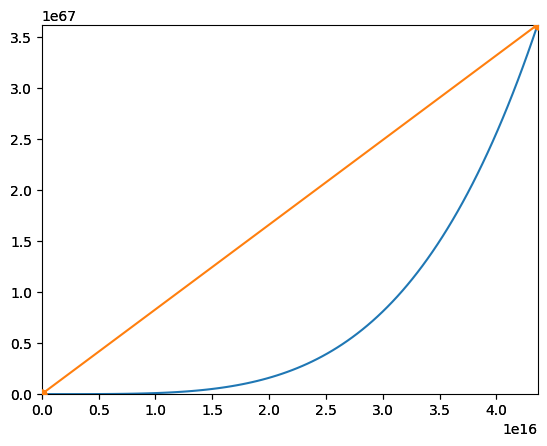

In [8]:
wrapper_2d(f, -3, -20)
# way too big - thronw out

[-20, 11.518999999999949, 5.35399252966401, 4.745423934649982] [1.1189229238804532, 1.11790615718987, 1.1169005986847775, 1.1159060957029732]


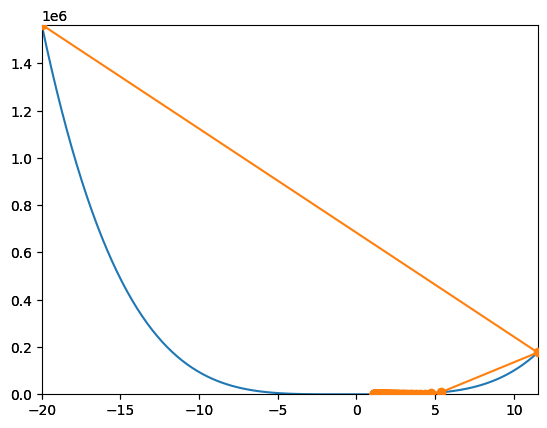

In [10]:
wrapper_2d(f, -4, -20)
# a little to big - local minum

[-20, -4.240500000000026, -4.109309340952273, -3.9909530857697617] [-1.5293832679592683, -1.5283694784512711, -1.5273654707849, -1.5263711329110377]


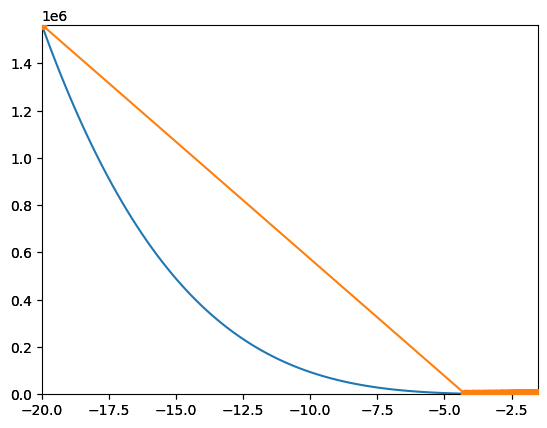

In [12]:
wrapper_2d(f, -5, -20, coef=5)
# optimal - global minimum

[-40, -14.568099999999976, -13.359329067642387, -12.429802391386433] [-1.8473264876537205, -1.846320333165018, -1.8453173586073919, -1.844317549647455]


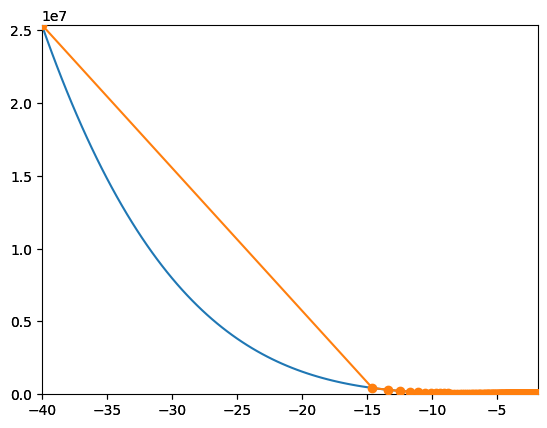

In [160]:
wrapper_2d(f, -5, -40)

[30, 19.136900000000153, 16.311988840256618, 14.561604755313335] [1.5980597519894368, 1.5970562995100974, 1.596055606716254, 1.595057661994205]


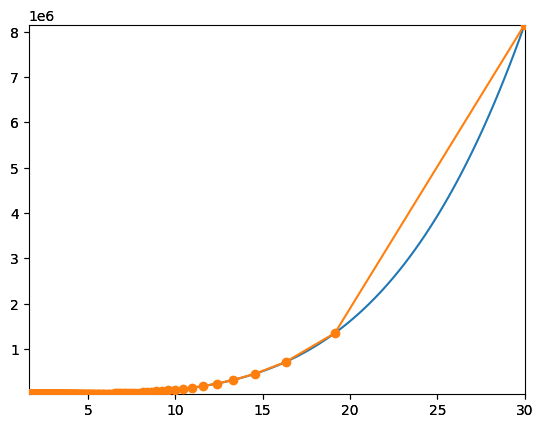

In [162]:
wrapper_2d(f, -5, 30)

[-20, -19.68481, -19.384380459434677, -19.097584810739026] [-3.1863325822137245, -3.1853311395011246, -3.1843307989743654, -3.183331558672984]


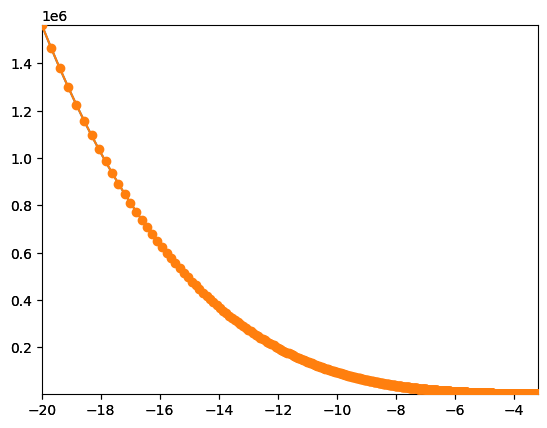

In [149]:
wrapper_2d(f, -6, -20)

[20, 19.677590000000002, 19.37050333232436, 19.077553394373965] [3.0095090096940558, 3.008507763617805, 3.0075075995460736, 3.0065085155689]


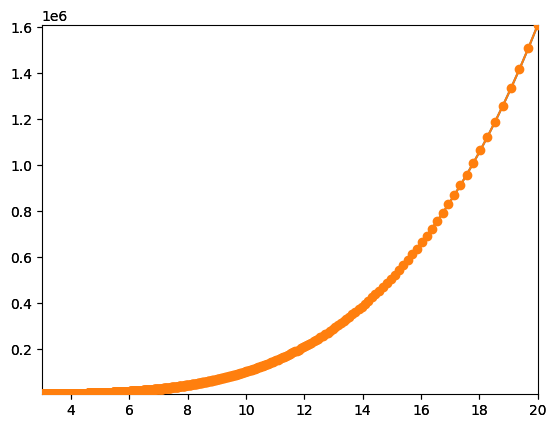

In [14]:
wrapper_2d(f, -6, 20)
# to small - not reachead minium

#### close to minum

[-2.5, 1.5875000000000101, 0.6128867187499827, 0.7547245511574969] [1.001626424548134, 1.0103543992983797, 1.0121392182683056, 1.0124798172819198]


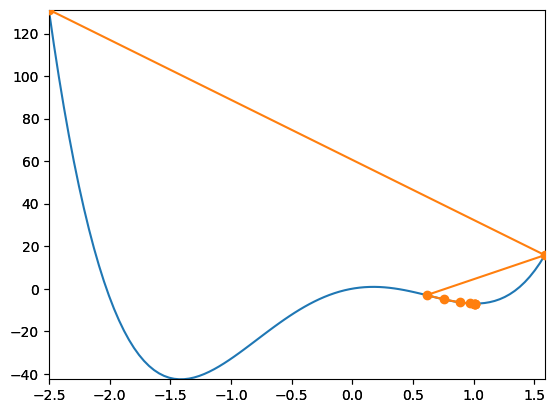

In [161]:
wrapper_2d(f, -2, -2.5)

[-2.5, 38.3750000000001, -227108.08750000122, 4.685515309674708e+16] [38.3750000000001, -227108.08750000122, 4.685515309674708e+16, 4.685515309674708e+16]


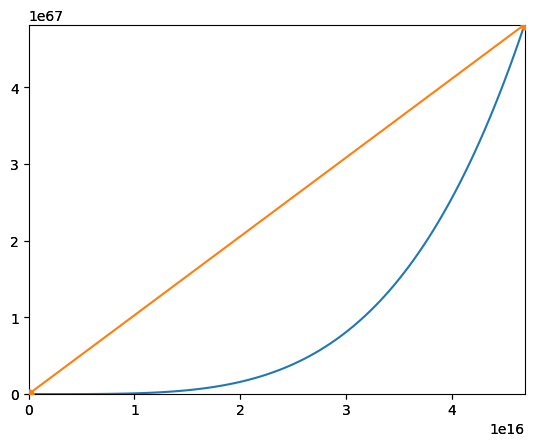

In [163]:
wrapper_2d(f, -1, -2.5)

[-2.5, -2.091249999999999, -1.9002561721093745, -1.7822993153919353] [-1.4212076627219277, -1.4198346191467548, -1.4186765616210066, -1.4176993553733601]


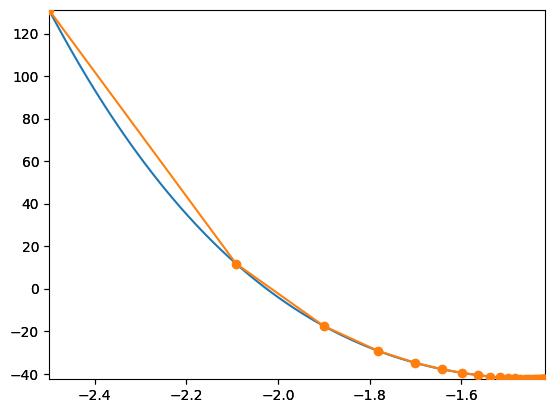

In [164]:
wrapper_2d(f, -3, -2.5)

[0.5, 0.51275, 0.525756450280625, 0.5390008780323389] [0.9984970489231976, 0.9996139878497963, 1.000644077578119, 1.0015937860025037]


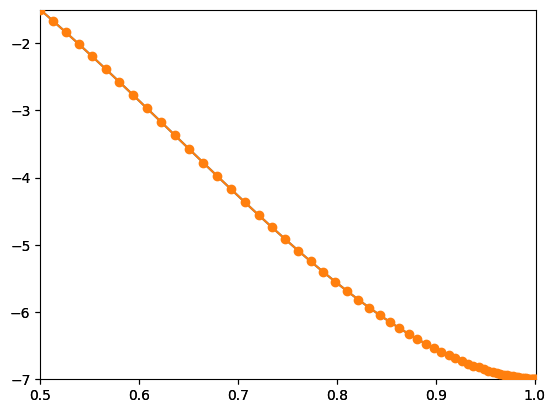

In [165]:
wrapper_2d(f, -3, 0.5)

[0.5, 0.6275, 0.7697291187499999, 0.8958225863370257] [1.0032810102643444, 1.0107079212435106, 1.0122073407124916, 1.0124926525798699]


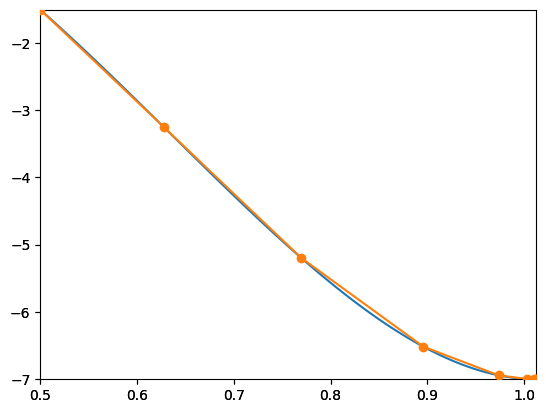

In [166]:
wrapper_2d(f, -2, 0.5)

[-9, -8.972119, -8.944501982062908, -8.917144810362572] [-3.186628627311093, -3.1856268586284506, -3.1846261927117174, -3.1836266275989913]
[-9, -8.72119, -8.468037501097504, -8.236782754301352] [-1.8472221405673352, -1.8462163160655973, -1.8452136700064299, -1.8442141880656158]
[-9, -6.211900000000002, -5.326088556924363, -4.780230296883371] [-1.4750638828255511, -1.4740346428419762, -1.4730233500852123, -1.4720296569587084]
[-9, 18.88099999999998, -252.44170912263962, 642651.1194560401] [-252.44170912263962, 642651.1194560401, -1.0616612068849478e+16, -1.0616612068849478e+16]
[-9, 269.8099999999998, -7862710.666905402, 1.944360828466955e+20] [269.8099999999998, -7862710.666905402, 1.944360828466955e+20, 1.944360828466955e+20]
[-22, -21.579766, -21.18328590679865, -20.808381095707762] [-3.186689040074441, -3.1856872048643283, -3.184686472538526, -3.1836868411348385]
[-22, -17.79765999999999, -15.581935468899117, -14.099939249004258] [-1.8469704982152546, -1.8459654693161545, -1.844963

/tmp/ipykernel_8653/4005202617.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure()


[-25, -24.382134999999995, -23.809162363165207, -23.27582888755114] [-3.1863915420691864, -3.1853900344421473, -3.1843896291164557, -3.1833903241313615]
[-25, -18.821349999999956, -16.197690479375662, -14.53123798860657] [-1.8472998366041407, -1.8462937664010544, -1.8452908757488244, -1.8442911503164061]
[-25, 36.78650000000042, -163.3365245157899, 17242.174623438827] [17242.174623438827, -20504132928.375362, 3.4481353682156594e+28, 3.4481353682156594e+28]
[-25, 592.8650000000042, -8337953.836266596, 2.318667306143828e+19] [592.8650000000042, -8337953.836266596, 2.318667306143828e+19, 2.318667306143828e+19]
[-25, 6153.650000000042, -93212509110.55891, 3.2394812785161396e+32] [6153.650000000042, -93212509110.55891, 3.2394812785161396e+32, 3.2394812785161396e+32]
[-6, -5.992054, -5.9841409469202995, -5.976260615044934] [-3.1864736952587585, -3.1854720971772332, -3.1844716015580152, -3.183472206439955]
[-6, -5.92054, -5.844334488111454, -5.771166941230457] [-1.8472836800451817, -1.8462776

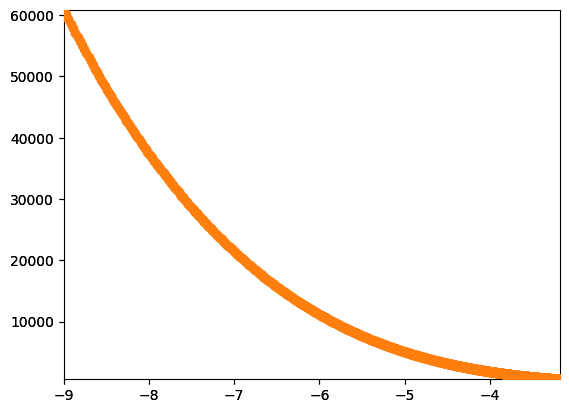

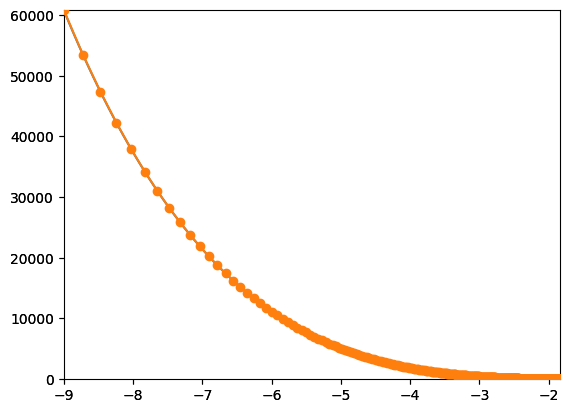

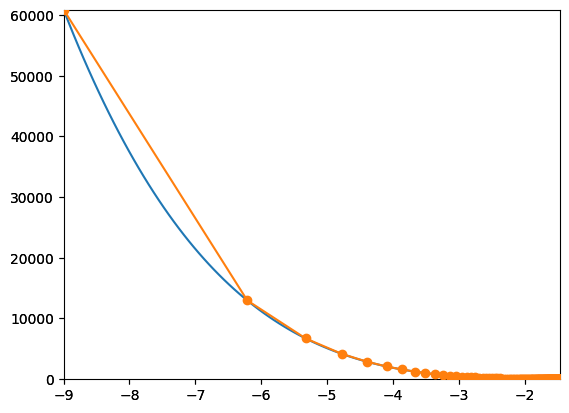

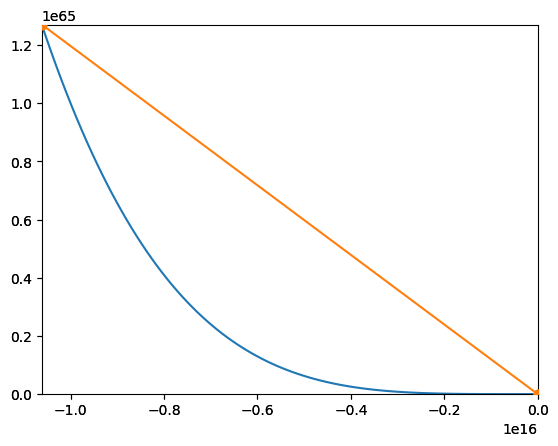

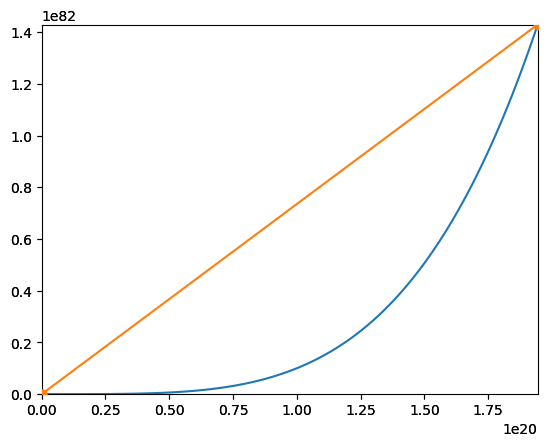

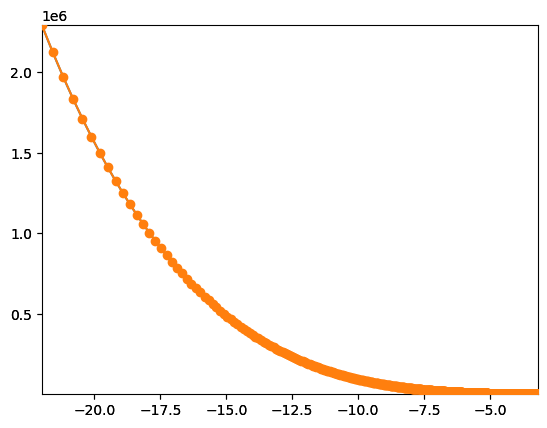

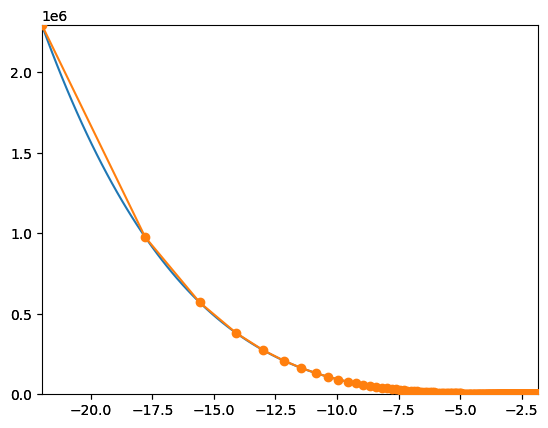

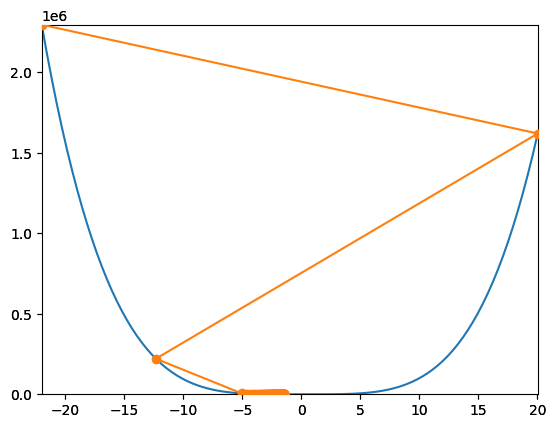

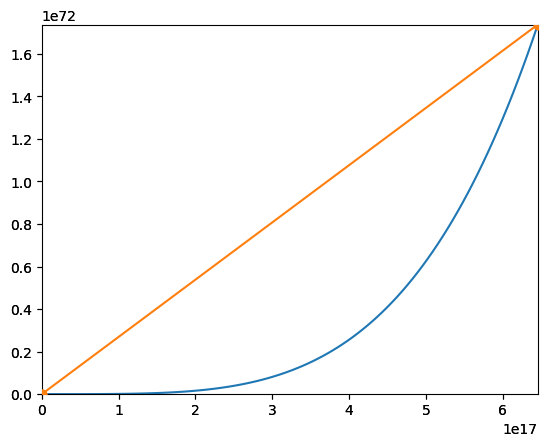

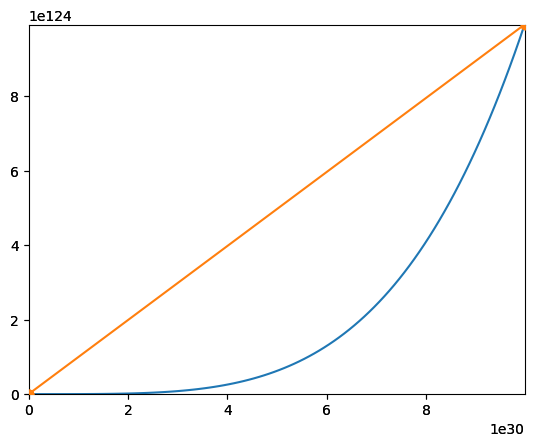

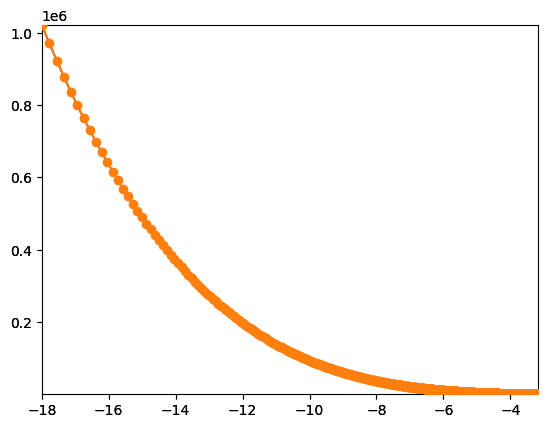

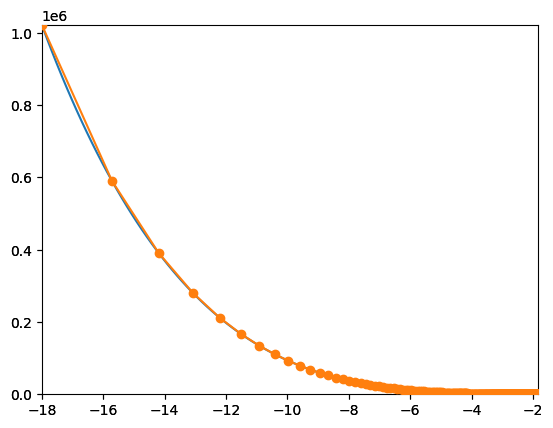

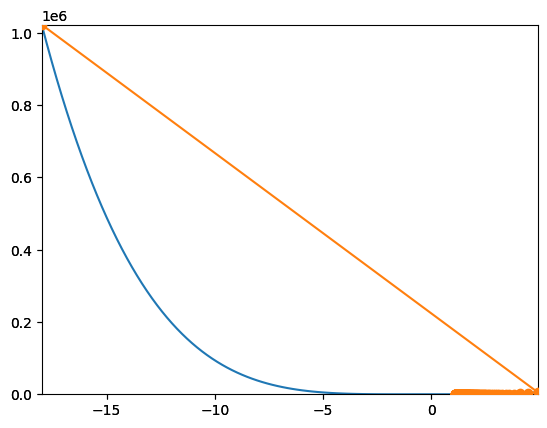

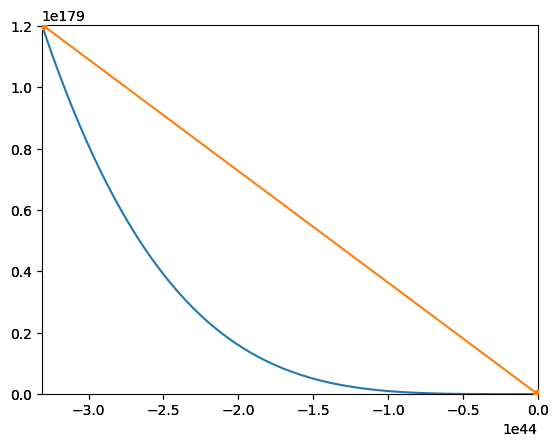

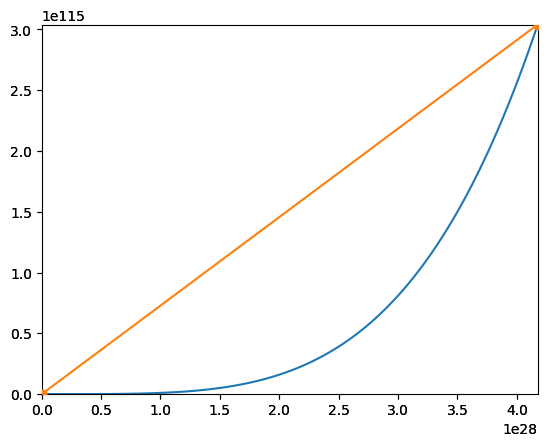

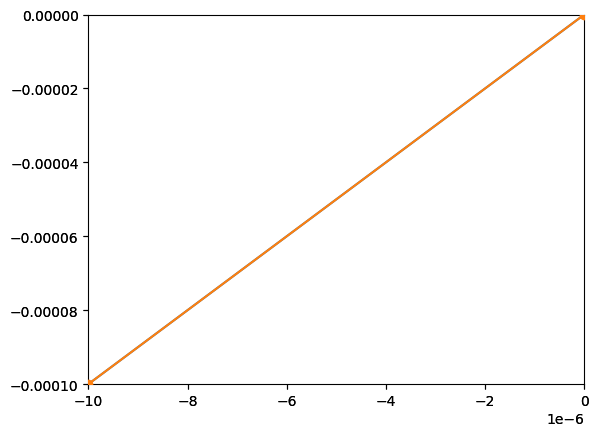

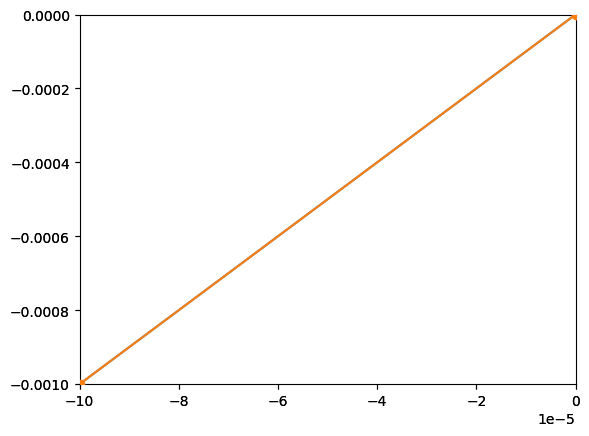

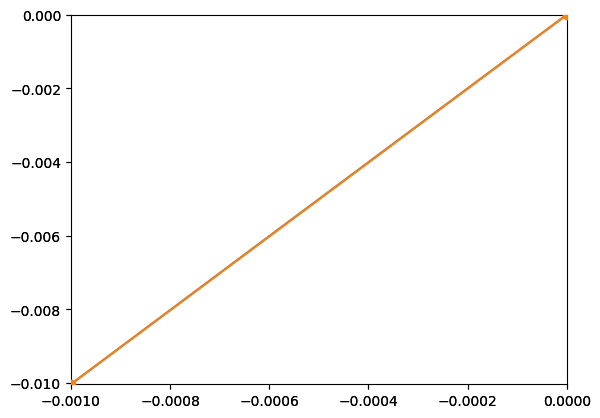

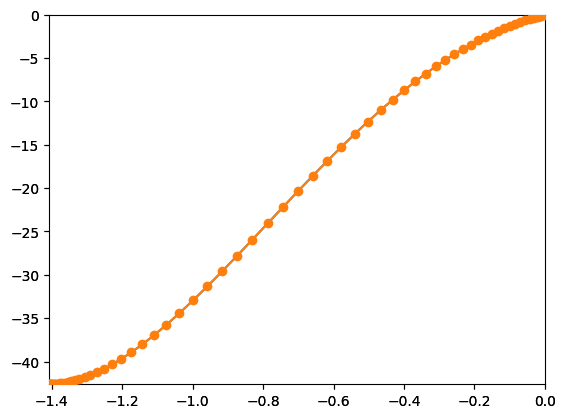

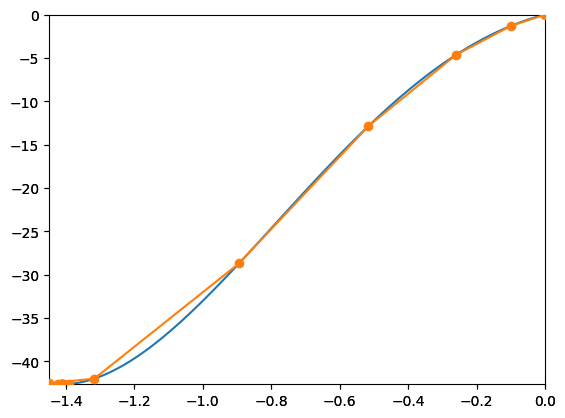

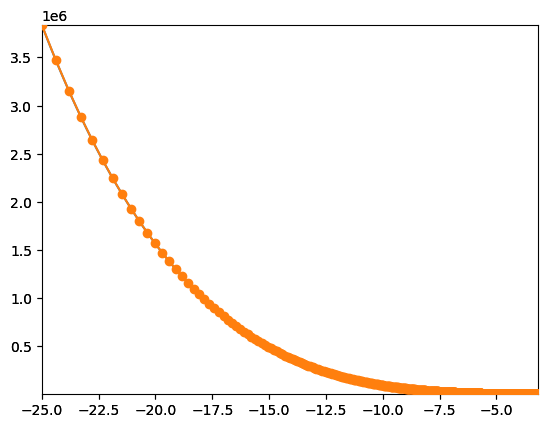

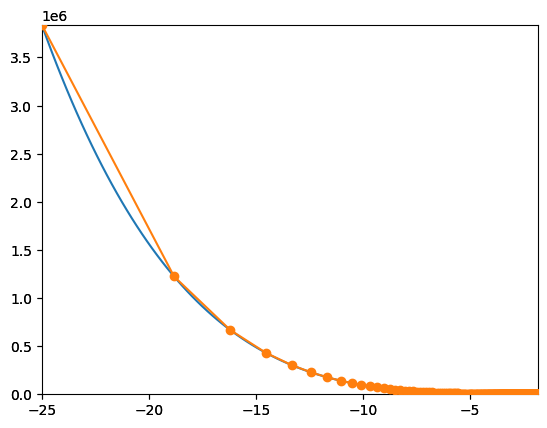

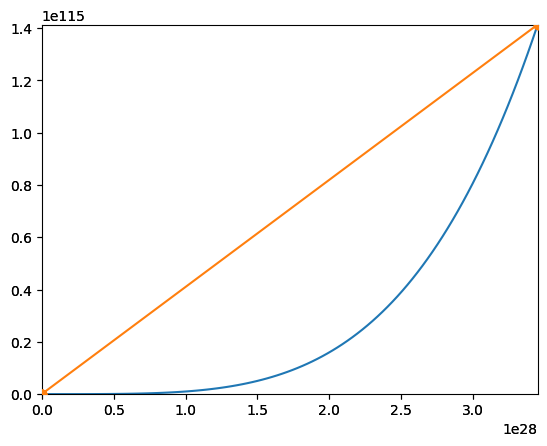

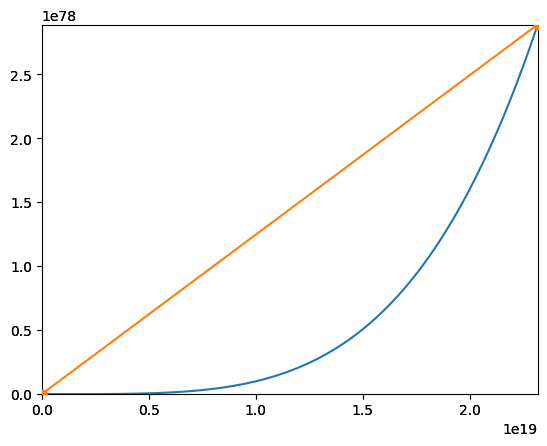

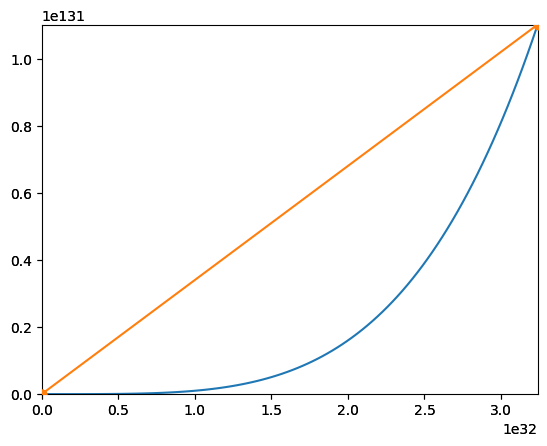

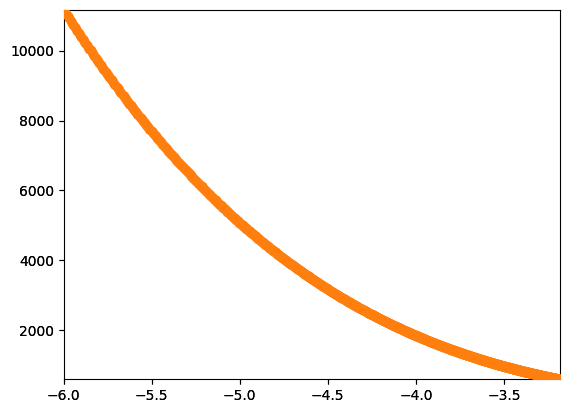

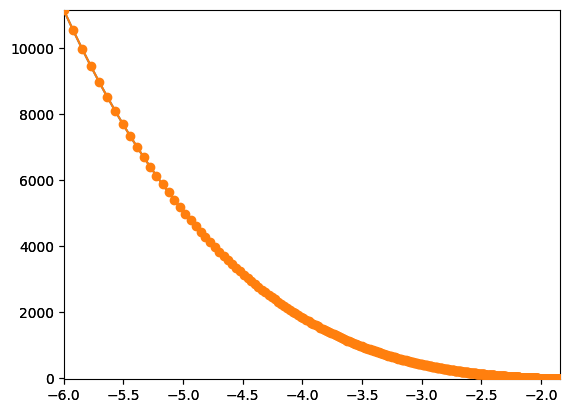

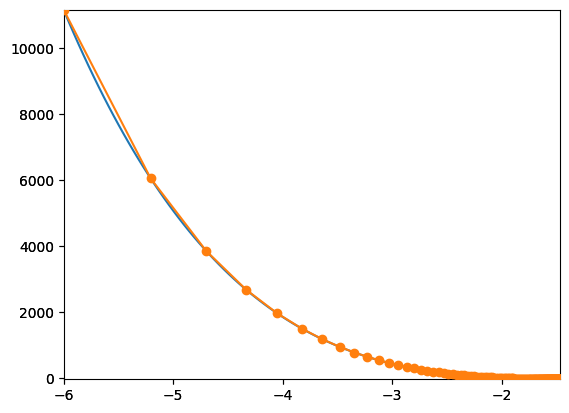

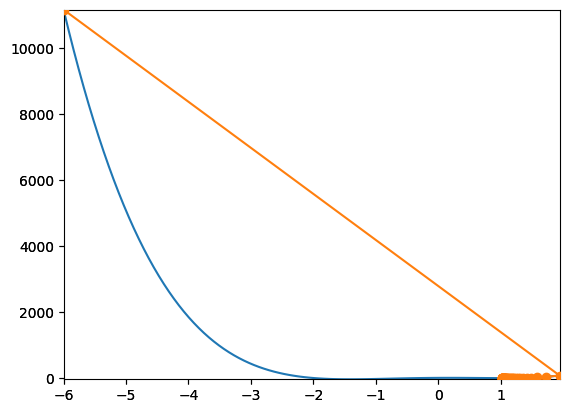

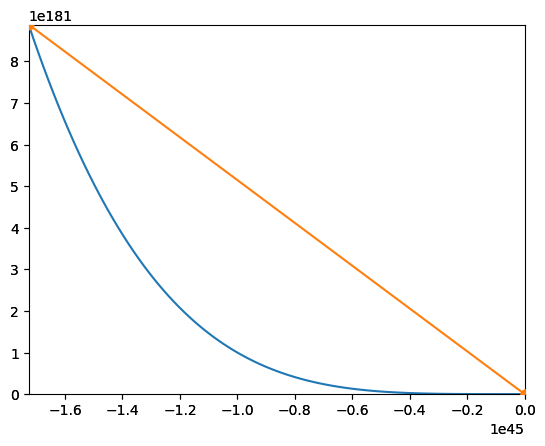

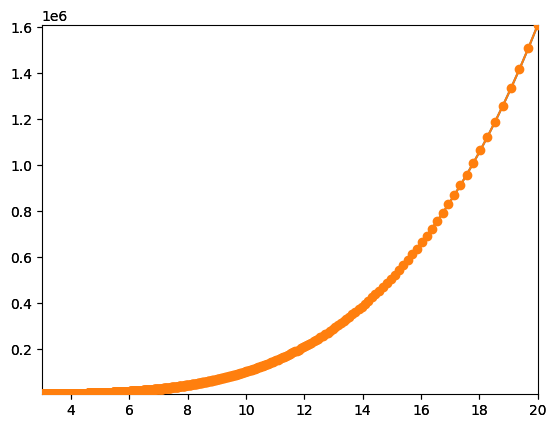

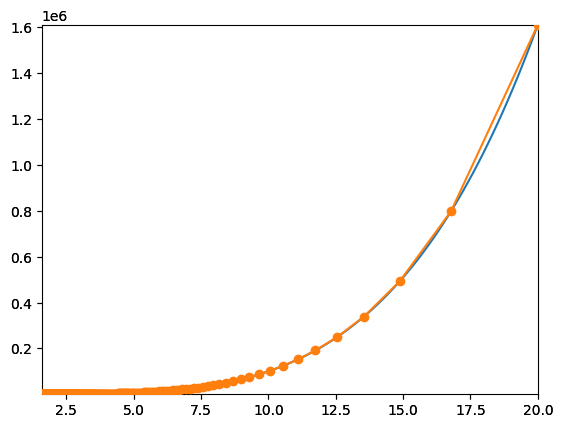

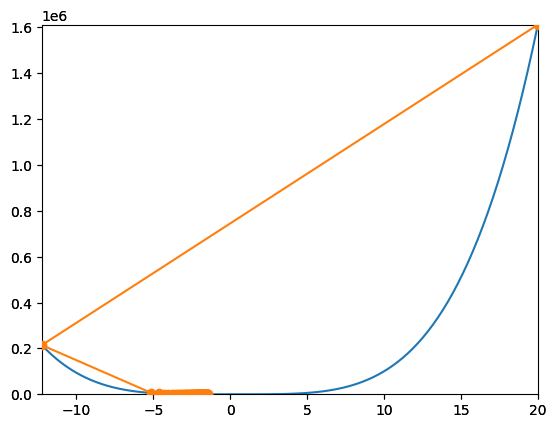

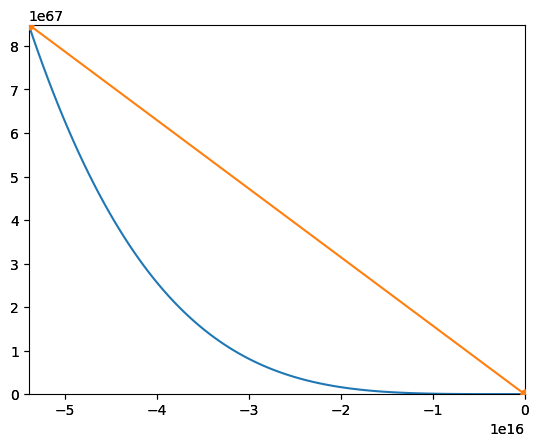

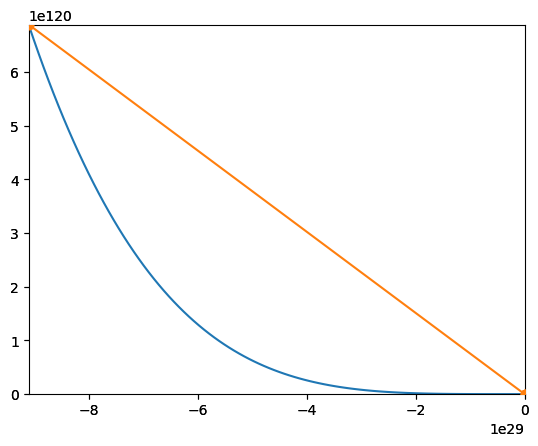

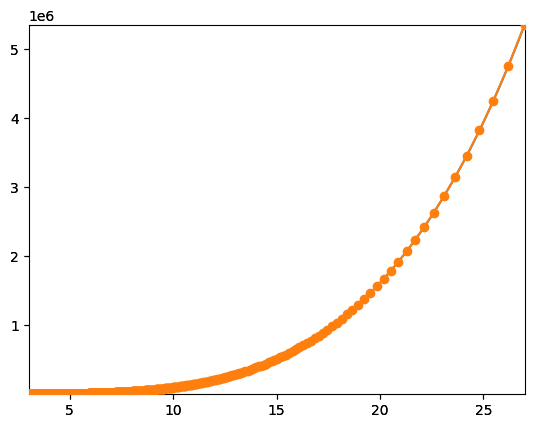

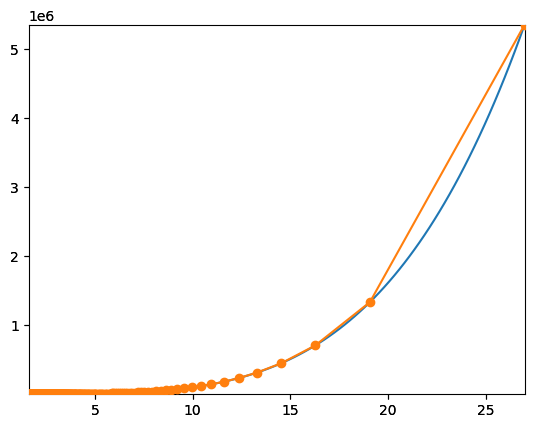

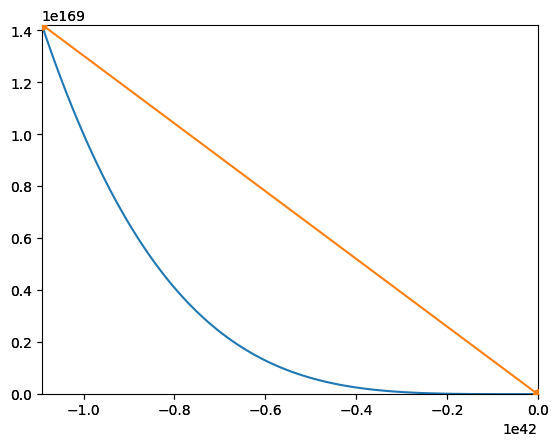

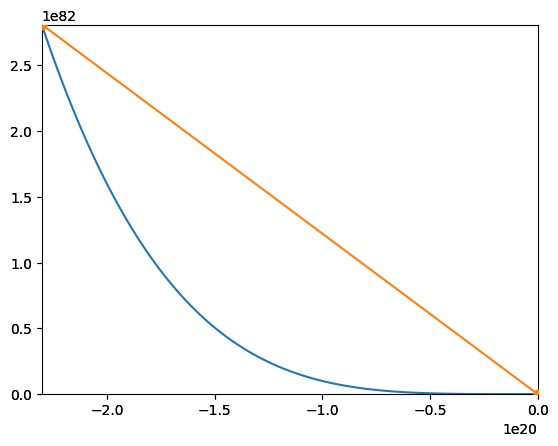

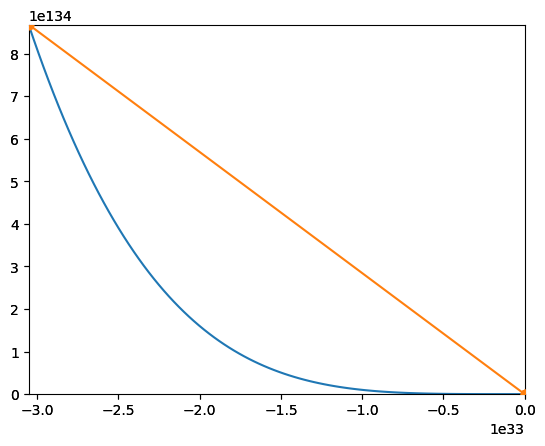

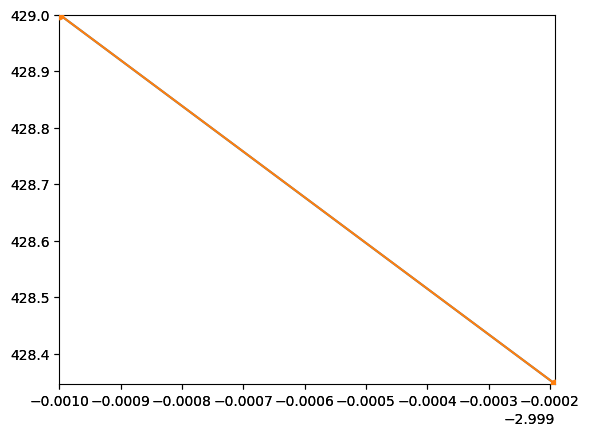

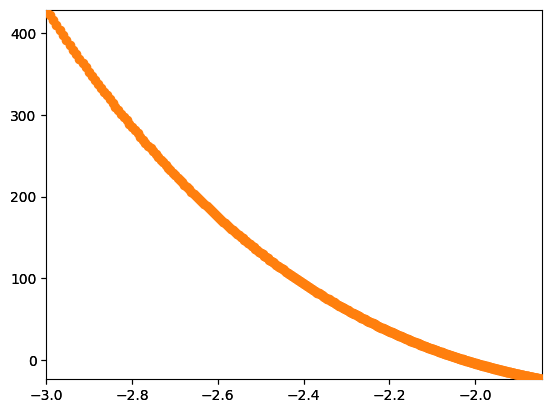

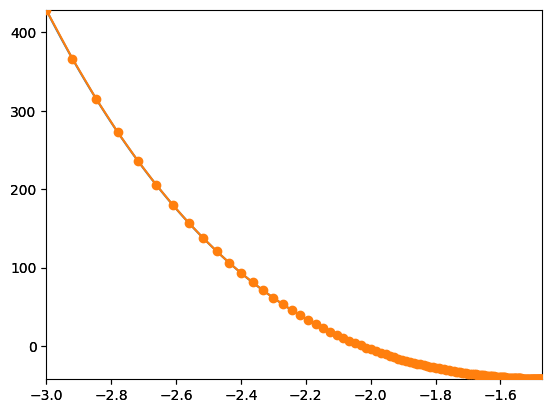

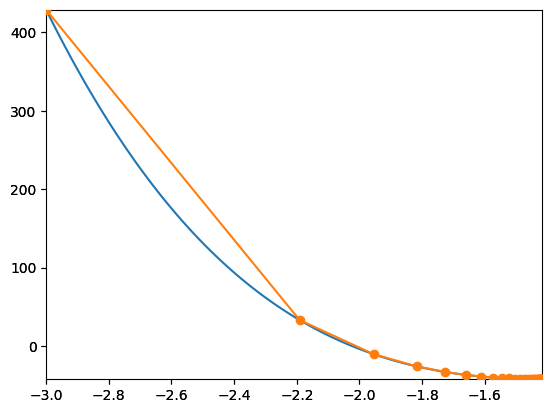

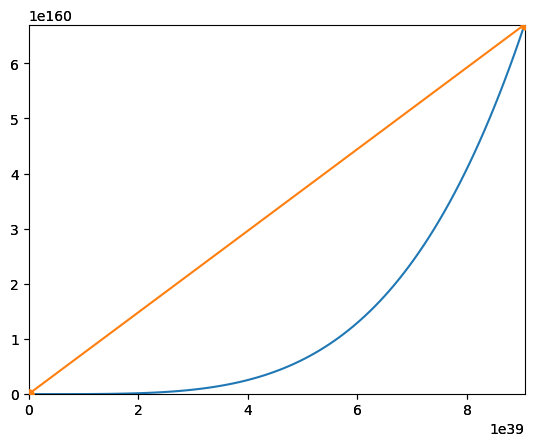

In [200]:
from random import randint


for _ in range(9):
    starting_point = randint(-40, 40)
    for step in range(-6, -1):
        wrapper_2d(f, step, starting_point, save=True)
    

## conclusions

#### choosing learning rate
- way too big step will result in "throwing out" away from minimum
- too big step - osciliation, issues with findig exact minimum may occur
- too small - calculation will take more time

#### choosing starting point
- staring point closer to local minimum than global one may result in "getting stucked" in this local minimum
- points closer to minimum are more sensitive to higher learnig rates

we should find something between too big and too small

## g(x) tuninng

In [261]:
gradient_descent = GradientDescent(0.01)
arguments = gradient_descent.find_minumum(g, 0.001, np.array([7,7]))
values = [g(x) for x in arguments]
print(arguments)

[array([7, 7]), array([-6.751, -6.72 ]), array([4.7310993 , 5.41857792]), array([ 0.56761084, -0.94521384]), array([ 0.58145289, -0.91143458]), array([ 0.595434  , -0.88114896]), array([ 0.60952492, -0.85378317]), array([ 0.62369469, -0.8288887 ]), array([ 0.63791085, -0.80610897]), array([ 0.65213972, -0.78515621]), array([ 0.66634668, -0.76579519]), array([ 0.68049653, -0.7478314 ]), array([ 0.69455379, -0.73110236]), array([ 0.70848312, -0.71547108]), array([ 0.7222497 , -0.70082113]), array([ 0.73581957, -0.68705279]), array([ 0.74916007, -0.67408009]), array([ 0.76224014, -0.66182844]), array([ 0.77503069, -0.65023276]), array([ 0.78750489, -0.63923596]), array([ 0.79963842, -0.62878771]), array([ 0.81140969, -0.61884345]), array([ 0.82279998, -0.60936358]), array([ 0.83379356, -0.60031273]), array([ 0.84437775, -0.59165921]), array([ 0.85454288, -0.58337455]), array([ 0.86428229, -0.57543305]), array([ 0.87359217, -0.56781148]), array([ 0.88247149, -0.56048876]), array([ 0.890921

In [265]:
# g(x) plot

# external window
# %matplotlib qt
def plot_function_3d_and_path(function: Callable, step: Number, starting_point=Sequence, eps=0.01, save=False):
    # function plot
    fig = plt.figure()
    ax = fig.add_subplot(1,2,1, projection='3d', label="1")
    X = np.arange(-10, 10, 0.25)
    Y = np.arange(-10, 10, 0.25)
    X, Y = np.meshgrid(X, Y)
    Z = g([X, Y])
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

    # sgd and path
    sgd = GradientDescent(eps)
    arguments = sgd.find_minumum(g, step, starting_point)
    values = [g(x) for x in arguments]

    # path plot
    X = [x[0] for x in arguments]
    Y = [x[1] for x in arguments]
    Z = [g(x) for x in arguments]
    ax2 = fig.add_subplot(1,2,2,  projection='3d', label="2")
    ax2.plot(X, Y, Z)
    ax2.set_xticks([-10, -5, 0, 5, 10])
    ax2.set_yticks([-10, -5, 0, 5, 10])
    ax2.set_zticks([50000 * x for x in range(4)])


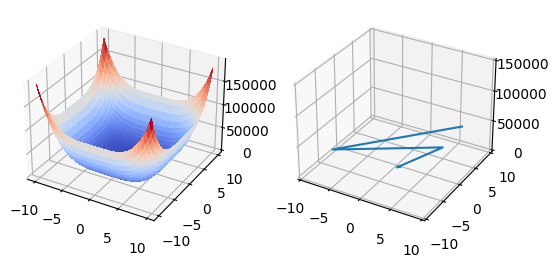

In [266]:
plot_function_3d_and_path(g, 0.001, np.array([7,7]), save=True)

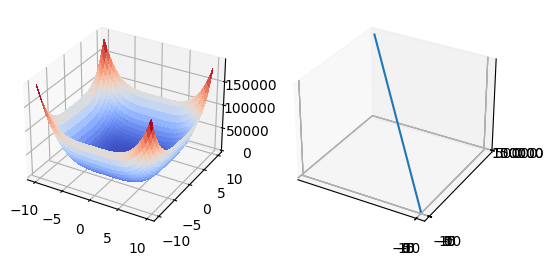

In [267]:
plot_function_3d_and_path(g, 0.001, [-10, 10], save=True)

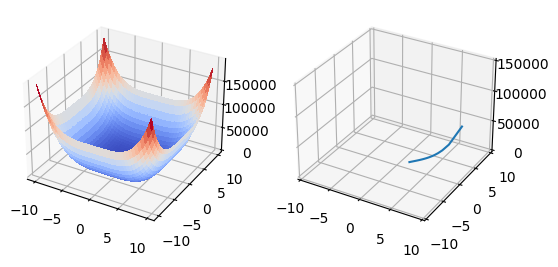

In [268]:
plot_function_3d_and_path(g, 0.0001, np.array([7,7]), save=True)

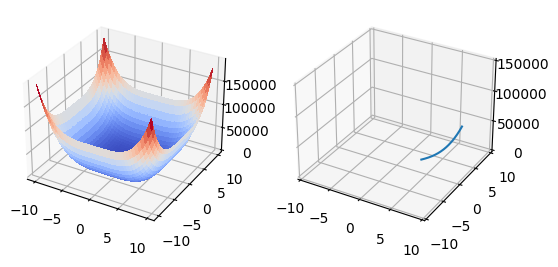

In [269]:
plot_function_3d_and_path(g, 0.00001, np.array([7,7]), save=True)

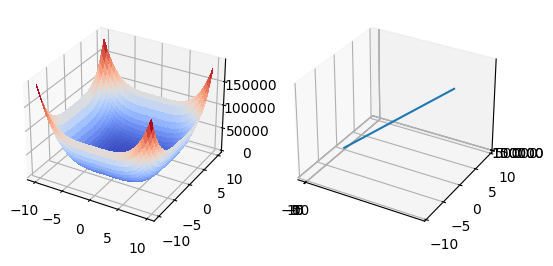

In [272]:
plot_function_3d_and_path(g, 0.1, np.array([0, 0]), save=True)

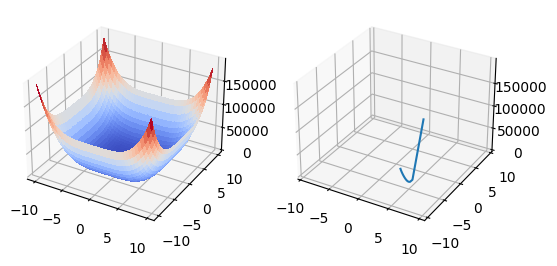

In [278]:
plot_function_3d_and_path(g, 0.00009, np.array([10, -10]), save=True)

## conclusions
Same rules should be applied to choose learning_rate in higher dimenstions. However it gets extremly difficult to obtain plot for each case.